In [0]:
import warnings
import tensorflow as tf
from keras_utils import SGDwithLR,AdamwithClip,RMSpropwithClip
from keras import models
from keras_focused import SimpleFocusedRNN
from keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing import sequence
from keras import layers
from keras.layers import Flatten,SimpleRNN
import numpy as np
import numpy
from keras import backend as K
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


The name for Record Variable has changed, use RecordWeights or RecordTensor instead
Not working!


Using TensorFlow backend.


In [0]:
import pandas as pd
dataset_train = pd.read_csv("trainset.csv")

In [0]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [0]:
trainset = dataset_train.iloc[:,1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [0]:
x_train = []
y_train = []

In [0]:
import numpy as np
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [0]:
x_train.shape

(1199, 60)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
from keras.layers import Dropout
K.clear_session()
regressor = Sequential()
regressor.add(SimpleFocusedRNN(units = 50,name='focus-1',kernel_initializer='he_normal',
                                  init_sigma_current=0.1,
                                  init_sigma_prev=0.1,
                                   initer='Glorot',
                                   distribution='uniform',
                                    return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

  

input_shape (None, 1)
self.input_dim=  1
initilizer=  Glorot
distribution uniform
u_current Tensor("focus-1/transpose_2:0", shape=(1, 50), dtype=float32)
u_previous Tensor("focus-1/transpose_3:0", shape=(50, 50), dtype=float32)
u_current Tensor("focus-1/while/transpose:0", shape=(1, 50), dtype=float32)
u_previous Tensor("focus-1/while/transpose_1:0", shape=(50, 50), dtype=float32)


In [0]:
regressor.add(SimpleFocusedRNN(units = 50,name='focus-2',kernel_initializer='he_normal',
                                  init_sigma_current=0.1,
                                  init_sigma_prev=0.1,
                                   initer='Glorot',
                                   distribution='uniform',
                                   return_sequences = True))
regressor.add(Dropout(0.2))

input_shape (None, 50)
self.input_dim=  50
initilizer=  Glorot
distribution uniform
u_current Tensor("focus-2/transpose_2:0", shape=(50, 50), dtype=float32)
u_previous Tensor("focus-2/transpose_3:0", shape=(50, 50), dtype=float32)
u_current Tensor("focus-2/while/transpose:0", shape=(50, 50), dtype=float32)
u_previous Tensor("focus-2/while/transpose_1:0", shape=(50, 50), dtype=float32)


In [0]:
regressor.add(SimpleFocusedRNN(units = 50,name='focus-3',kernel_initializer='he_normal',
                                  init_sigma_current=0.1,
                                  init_sigma_prev=0.1,
                                   initer='Glorot',
                                   distribution='uniform',
                                   return_sequences = True))
regressor.add(Dropout(0.2))

input_shape (None, 50)
self.input_dim=  50
initilizer=  Glorot
distribution uniform
u_current Tensor("focus-3/transpose_2:0", shape=(50, 50), dtype=float32)
u_previous Tensor("focus-3/transpose_3:0", shape=(50, 50), dtype=float32)
u_current Tensor("focus-3/while/transpose:0", shape=(50, 50), dtype=float32)
u_previous Tensor("focus-3/while/transpose_1:0", shape=(50, 50), dtype=float32)


In [0]:
regressor.add(SimpleFocusedRNN(units = 50,name='focus-4',kernel_initializer='he_normal',
                                  init_sigma_current=0.1,
                                  init_sigma_prev=0.1,
                                   initer='Glorot',
                                   distribution='uniform'))
regressor.add(Dropout(0.2))

input_shape (None, 50)
self.input_dim=  50
initilizer=  Glorot
distribution uniform
u_current Tensor("focus-4/transpose_2:0", shape=(50, 50), dtype=float32)
u_previous Tensor("focus-4/transpose_3:0", shape=(50, 50), dtype=float32)
u_current Tensor("focus-4/while/transpose:0", shape=(50, 50), dtype=float32)
u_previous Tensor("focus-4/while/transpose_1:0", shape=(50, 50), dtype=float32)


In [0]:
from keras.layers import Dense
regressor.add(Dense(units = 1))

In [0]:
opt=AdamwithClip()
regressor.compile(optimizer = opt,loss = 'mean_squared_error')
print(regressor.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
focus-1 (SimpleFocusedRNN)   (None, 60, 50)            2800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
focus-2 (SimpleFocusedRNN)   (None, 60, 50)            5250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
focus-3 (SimpleFocusedRNN)   (None, 60, 50)            5250      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
focus-4 (SimpleFocusedRNN)   (None, 50)               

In [0]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1199/1199 [==============================] - 10s 8ms/step - loss: 0.2179
Epoch 2/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0534
Epoch 3/100
1199/1199 [==============================] - 7s 5ms/step - loss: 0.0362
Epoch 4/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0228
Epoch 5/100
1199/1199 [==============================] - 7s 5ms/step - loss: 0.0174
Epoch 6/100
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0161
Epoch 7/100
1199/1199 [==============================] - 7s 5ms/step - loss: 0.0114
Epoch 8/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0095
Epoch 9/100
1199/1199 [==============================] - 7s 5ms/step - loss: 0.0095
Epoch 10/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0081
Epoch 11/100
1199/1199 [==============================] - 7s 5ms/step - loss: 0.0077
Epoch 12/100
1199/1199 [==============================] - 7s 5ms/step - l

In [0]:
dataset_test =pd.read_csv("testset.csv")

In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [0]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [0]:
inputs = inputs.reshape(-1,1)

In [0]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [0]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [0]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [0]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [0]:
predicted_price = regressor.predict(x_test)

In [0]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1044.3429 ],
       [1043.4155 ],
       [1050.2107 ],
       [1063.9387 ],
       [1072.5941 ],
       [1079.9296 ],
       [1086.5673 ],
       [1084.2773 ],
       [1087.746  ],
       [1087.876  ],
       [1101.1265 ],
       [1104.9287 ],
       [1108.2561 ],
       [1110.751  ],
       [1113.843  ],
       [1125.8119 ],
       [1138.282  ],
       [1141.8728 ],
       [1144.6056 ],
       [1146.8207 ],
       [1144.2627 ],
       [1144.7524 ],
       [1141.4834 ],
       [1122.3337 ],
       [1100.1267 ],
       [1061.5939 ],
       [1068.522  ],
       [1060.9242 ],
       [1037.81   ],
       [1041.8439 ],
       [1040.78   ],
       [1042.8717 ],
       [1056.9287 ],
       [1066.3156 ],
       [1071.786  ],
       [1081.592  ],
       [1090.1929 ],
       [1092.9385 ],
       [1101.1075 ],
       [1110.792  ],
       [1107.412  ],
       [1099.5172 ],
       [1071.5795 ],
       [1068.9197 ],
       [1079.6627 ],
       [1078.9683 ],
       [1090.3329 ],
       [1103.

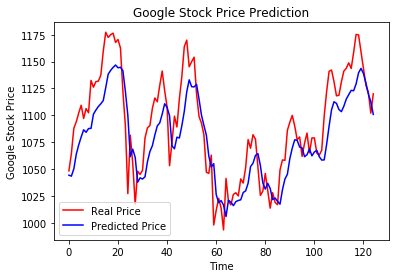

In [0]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()